# Buisness Problem

Product Shipment Delivered on time or not? To Meet E-Commerce Customer Demand

In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

################# visualization #################
import matplotlib.pyplot as plt 
from PIL import  Image
import seaborn as sns 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# Data Import 

In [3]:
data=pd.read_csv(r"C:\Users\Chetan Habib\Desktop\Machine Learning\Shipping_Data.csv")
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


# Data Pre-Processing

Data Type and conversion

Identifying & Treatment Missing Value

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [6]:
data.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
data=data.apply(LabelEncoder().fit_transform) # label in ascending order
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,0,3,0,2,1,81,1,1,0,43,228,1
1,1,4,0,2,4,120,0,1,1,58,1595,1
2,2,0,0,0,1,87,2,1,1,47,1754,1
3,3,1,0,1,2,80,2,2,1,9,173,1
4,4,2,0,0,1,88,1,2,0,45,1249,1


# Outliers

<AxesSubplot:>

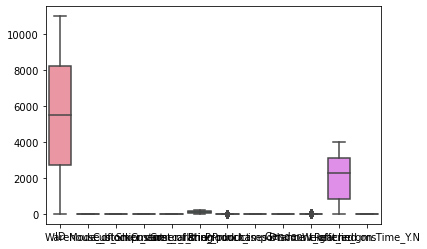

In [16]:
sns.boxplot(data=data)

In [11]:
data.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

<AxesSubplot:ylabel='Discount_offered'>

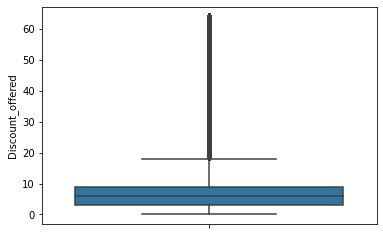

In [21]:
sns.boxplot(y='Discount_offered',data=data)

In [19]:
for i in data:
    if data[i].dtypes in ("float64","int64"):
        q1 = data[i].quantile(0.25)
        q3 = data[i].quantile(0.75)
        iqr = q3-q1
        ul = q3 + 1.5*iqr
        ll = q1 - 1.5*iqr
data[i].clip(upper=ul,lower=ll,inplace=True)

<AxesSubplot:>

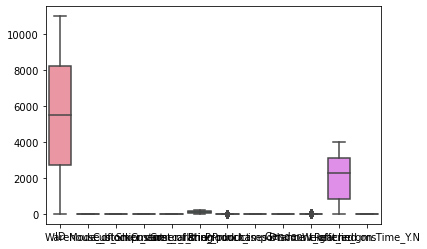

In [20]:
sns.boxplot(data=data)

In [22]:
q1 = data['Discount_offered'].quantile(0.25)
q3 = data['Discount_offered'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr 
upper_limit

18.0

In [24]:
data['Discount_offered']=np.where(data['Discount_offered'] > upper_limit,upper_limit,data['Discount_offered'])

In [27]:
q1 = data['Prior_purchases'].quantile(0.25)
q3 = data['Prior_purchases'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr 
upper_limit

3.5

In [28]:
data['Prior_purchases']=np.where(data['Prior_purchases'] > upper_limit,upper_limit,data['Prior_purchases'])

<AxesSubplot:>

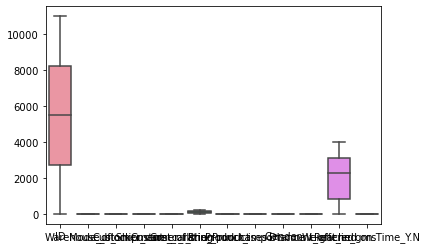

In [31]:
sns.boxplot(data=data)

# Data Visualization

In [34]:
import plotly.express as px

fig = px.pie(data,names='Reached.on.Time_Y.N',color='Reached.on.Time_Y.N',
             color_discrete_map={0:'red',
                                 1:'green'})
fig.show()

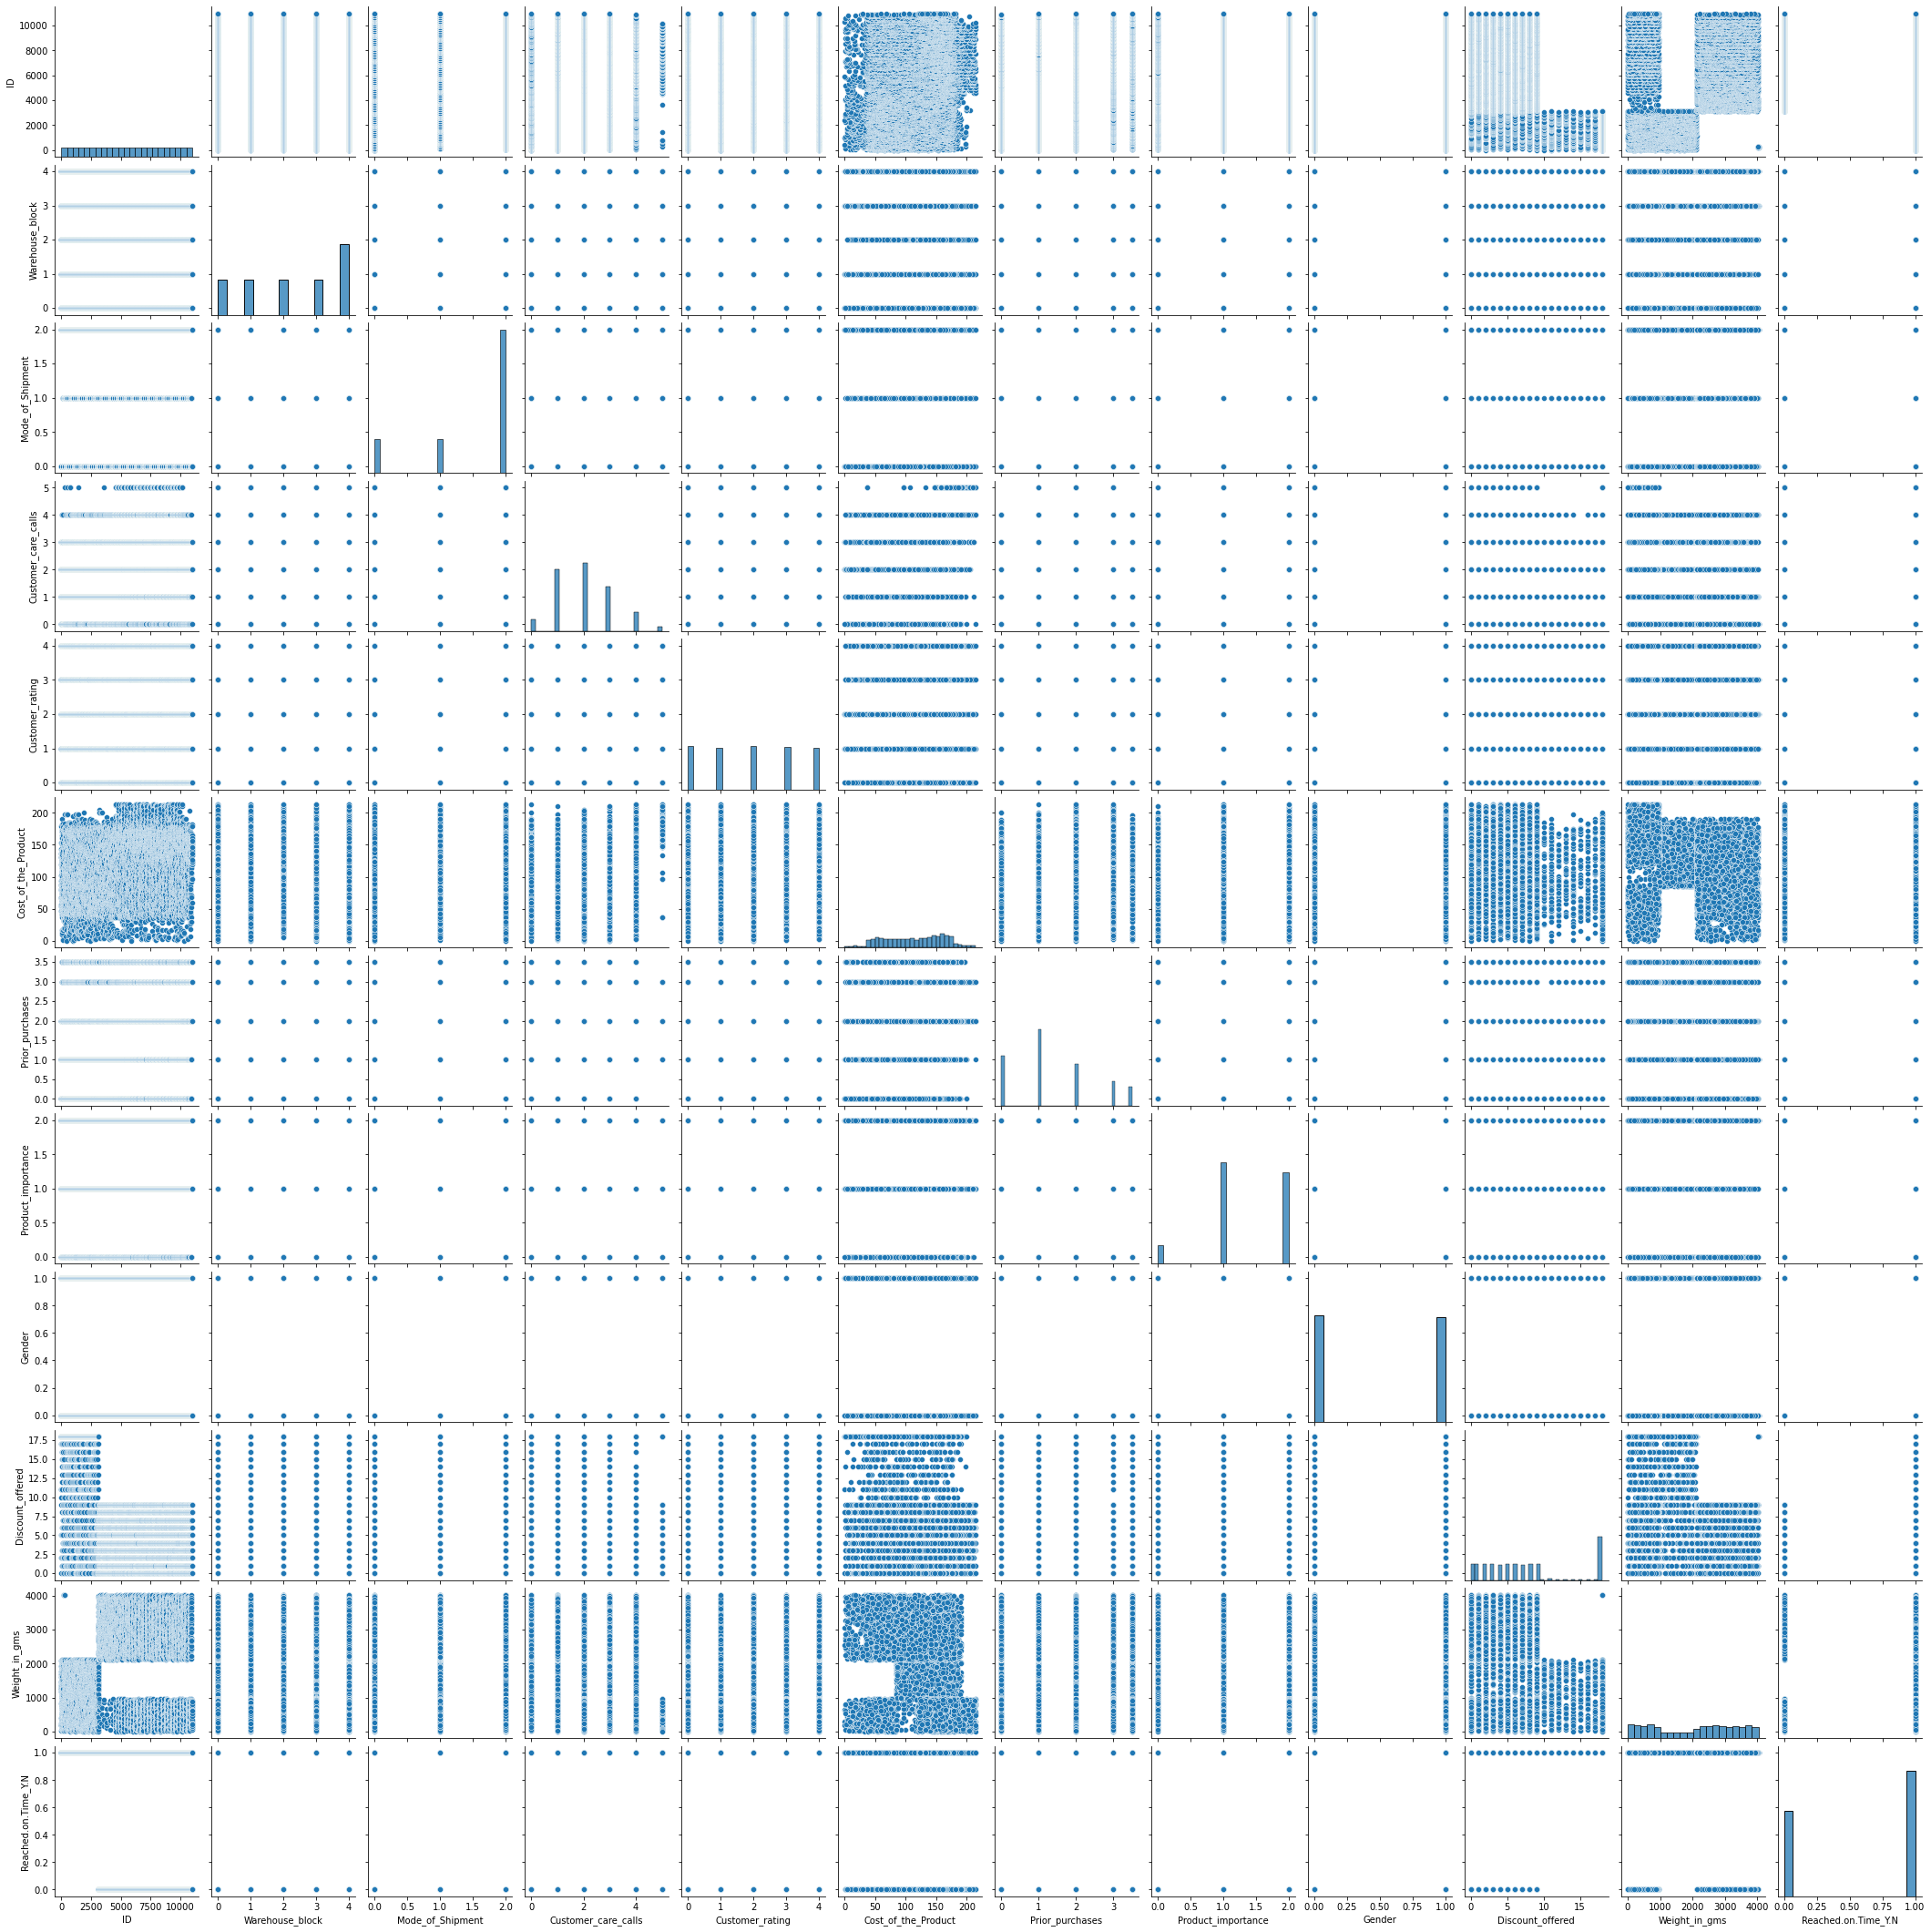

In [36]:
sns.pairplot(data)
plt.show()

# 5. Breaking Data into Two Part
Quantitative Variable

Qualitative Variable

In [37]:
data=data.drop('ID',axis=1)
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,2,1,81,1.0,1,0,18.0,228,1
1,4,0,2,4,120,0.0,1,1,18.0,1595,1
2,0,0,0,1,87,2.0,1,1,18.0,1754,1
3,1,0,1,2,80,2.0,2,1,9.0,173,1
4,2,0,0,1,88,1.0,2,0,18.0,1249,1


In [38]:
data.select_dtypes(include=[np.number]).columns.tolist()

['Warehouse_block',
 'Mode_of_Shipment',
 'Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Product_importance',
 'Gender',
 'Discount_offered',
 'Weight_in_gms',
 'Reached.on.Time_Y.N']

In [41]:
# Qualitative Variable
Quantitative_Variable = data[data.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,2,1,81,1.0,1,0,18.0,228,1
1,4,0,2,4,120,0.0,1,1,18.0,1595,1
2,0,0,0,1,87,2.0,1,1,18.0,1754,1


In [44]:
Qualitative_Variable = data[data.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(3)

""
0
1
2


In [45]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,2,1,81,1.0,1,0,18.0,228,1
1,4,0,2,4,120,0.0,1,1,18.0,1595,1
2,0,0,0,1,87,2.0,1,1,18.0,1754,1
3,1,0,1,2,80,2.0,2,1,9.0,173,1
4,2,0,0,1,88,1.0,2,0,18.0,1249,1


# Data Partition

In [46]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = Final_combined.drop('Reached.on.Time_Y.N', axis = 1)
Y = Final_combined[['Reached.on.Time_Y.N']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=56)

# Model building

Hypothesis

H0 :- There is no log linear relationship between Reached.on.Time_Y.N  and all independent Variable

Vs

H1 :- There is log linear relationship between Reached.on.Time_Y.N  and all independent Variable

Alpha = 0.05 (5%)

 - Logistics Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
output=logreg.fit(X_train, y_train)

In [48]:
output.intercept_ 

array([0.02686851])

In [49]:
output.n_features_in_

10

In [50]:
output.feature_names_in_

array(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered',
       'Weight_in_gms'], dtype=object)

We Reject Ho

There is log linear relationship between Reached.on.Time_Y.N and all independent variable

# Predictions on Train Dataset

In [51]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
5187,1,1,3,4,161,2.0,2,1,9.0,3251,1
8015,4,2,3,3,160,3.0,1,1,5.0,532,0
2286,3,2,3,3,138,0.0,0,0,18.0,1593,1
7299,1,2,3,3,154,2.0,1,1,1.0,2299,0
2491,4,2,1,4,60,0.0,1,0,18.0,292,1


In [52]:
train['Predicted']=output.predict(X_train)
train.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Predicted
5187,1,1,3,4,161,2.0,2,1,9.0,3251,1,1
8015,4,2,3,3,160,3.0,1,1,5.0,532,0,1
2286,3,2,3,3,138,0.0,0,0,18.0,1593,1,1
7299,1,2,3,3,154,2.0,1,1,1.0,2299,0,0
2491,4,2,1,4,60,0.0,1,0,18.0,292,1,1


# Model Performance Metrics

In [54]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['Reached.on.Time_Y.N'])
matrix

array([[1964, 1608],
       [1597, 3630]], dtype=int64)

In [56]:
Accuracy_Train=((1964+3630)/(8799)*100)
print(Accuracy_Train)

63.57540629617002


In [57]:
1964+1608+1597+3630

8799

63 % Accuracy model is not good fit

In [58]:
from sklearn.metrics import classification_report
print(classification_report(train['Reached.on.Time_Y.N'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55      3561
           1       0.69      0.69      0.69      5238

    accuracy                           0.64      8799
   macro avg       0.62      0.62      0.62      8799
weighted avg       0.64      0.64      0.64      8799



Accuracy of Model is 63%,Hence Model is not good Fit

Accuracy of Bad Customer Capture by Model is 69% ( Sensitivity )

Accuracy of Good Customer Capture by Model is 55% (Specificity)

# Predictions on Test Dataset

In [59]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
3105,1,2,3,1,118,3.5,1,0,2.0,1676,1
9259,4,2,3,3,40,1.0,2,1,3.0,3469,0
8290,2,2,2,4,125,3.5,0,1,8.0,2743,0
5498,0,2,5,2,185,2.0,1,1,0.0,210,1
403,4,1,2,1,153,3.0,2,1,18.0,2034,1


In [60]:
test['Predicted']=output.predict(X_test)
test.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Predicted
3105,1,2,3,1,118,3.5,1,0,2.0,1676,1,0
9259,4,2,3,3,40,1.0,2,1,3.0,3469,0,0
8290,2,2,2,4,125,3.5,0,1,8.0,2743,0,1
5498,0,2,5,2,185,2.0,1,1,0.0,210,1,0
403,4,1,2,1,153,3.0,2,1,18.0,2034,1,1


# Model Performance Metrics on Test data

In [62]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['Reached.on.Time_Y.N'])
print(matrix)

[[478 403]
 [397 922]]


In [63]:
478+403+397+922

2200

In [64]:
Accuracy_test=((478+922)/(2200)*100)
Accuracy_test

63.63636363636363

In [66]:
from sklearn.metrics import classification_report
print(classification_report(test['Reached.on.Time_Y.N'],test['Predicted']))

              precision    recall  f1-score   support

           0       0.54      0.55      0.54       875
           1       0.70      0.70      0.70      1325

    accuracy                           0.64      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.64      0.64      0.64      2200



Accuracy of Model is 63%,Hence Model is not  good Fit

Accuracy of Bad Customer Capture by Model is 70% ( Sensitivity )

Accuracy of Good Customer Capture by Model is 55%

# Coefficient

In [67]:
Model_Values=pd.DataFrame(output.intercept_,index=['Intercept'],columns=['Coefficient'])
Model_Values

,Coefficient
Intercept,0.026869


In [70]:
rows=[['Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N']]

abc=pd.DataFrame(output.coef_.T,index=rows,columns=['Coefficient'])
abc

,Coefficient
Mode_of_Shipment,0.034260
Customer_care_calls,0.035375
Customer_rating,-0.059091
Cost_of_the_Product,0.051583
Prior_purchases,-0.001124
Product_importance,-0.092654
Gender,0.010847
Discount_offered,0.017519
Weight_in_gms,0.160240
Reached.on.Time_Y.N,-0.000278


In [71]:
Model_Values.append(abc)

,Coefficient
Intercept,0.026869
"(Mode_of_Shipment,)",0.034260
"(Customer_care_calls,)",0.035375
"(Customer_rating,)",-0.059091
"(Cost_of_the_Product,)",0.051583
"(Prior_purchases,)",-0.001124
"(Product_importance,)",-0.092654
"(Gender,)",0.010847
"(Discount_offered,)",0.017519
"(Weight_in_gms,)",0.160240
